In [1]:
import cv2 as cv


In [3]:
img = cv.imread('lab4.jpg')

In [4]:
cv.imshow('aurora effect', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
import cv2
import numpy as np

img = cv2.imread('lab4.jpg')

rows, cols, channels = img.shape

negative_img = np.zeros((rows, cols, channels), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        for k in range(channels):
            negative_img[i, j, k] = 255 - img[i, j, k]

cv2.imshow('original', img)
cv2.imshow('negative', negative_img)
cv2.imwrite('negative_image.jpg', negative_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


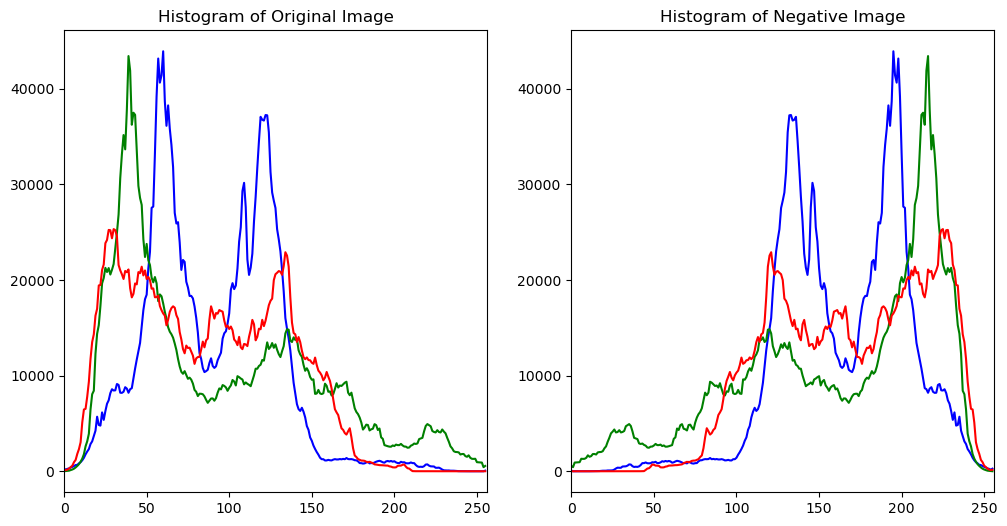

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in color
img = cv2.imread('lab4.jpg')

# Unpack the shape into rows, cols, and channels
rows, cols, channels = img.shape

# Create an empty array for the negative image
negative_img = np.zeros((rows, cols, channels), dtype=np.uint8)

# Perform the negative transformation manually
for i in range(rows):
    for j in range(cols):
        for k in range(channels):
            negative_img[i, j, k] = 255 - img[i, j, k]

# Function to compute histogram for each channel and plot it
def plot_histogram(image, title, position):
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        axes[position].plot(hist, color=color)
        axes[position].set_xlim([0, 256])
    axes[position].set_title(title)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_histogram(img, 'Histogram of Original Image', 0)
plot_histogram(negative_img, 'Histogram of Negative Image', 1)

# Display the original and negative images
cv2.imshow('Original Image', img)
cv2.imshow('Negative Image', negative_img)
cv2.imwrite('negative_image.jpg', negative_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.show()


In [6]:
import cv2
import numpy as np

# Read the image in color
img = cv2.imread('lab4.jpg')

# Unpack the shape into rows, cols, and channels
rows, cols, channels = img.shape

# Define the kernel size for blurring
kernel_size = 5

# Create an empty array for the blurred image
blurred_img = np.zeros((rows, cols, channels), dtype=np.uint8)

# Perform the blurring manually
for i in range(rows):
    for j in range(cols):
        # Initialize the sum for each channel
        sum_r = sum_g = sum_b = 0
        count = 0
        # Iterate over the kernel
        for k in range(-kernel_size//2, kernel_size//2 + 1):
            for l in range(-kernel_size//2, kernel_size//2 + 1):
                # Calculate the neighbor coordinates
                ni = i + k
                nj = j + l
                # Check if the neighbor is within the image bounds
                if 0 <= ni < rows and 0 <= nj < cols:
                    # Accumulate the sum for each channel
                    sum_r += img[ni, nj, 0]
                    sum_g += img[ni, nj, 1]
                    sum_b += img[ni, nj, 2]
                    count += 1
        # Calculate the average for each channel
        blurred_img[i, j, 0] = sum_r // count
        blurred_img[i, j, 1] = sum_g // count
        blurred_img[i, j, 2] = sum_b // count

# Display the original and blurred images
cv2.imshow('Original Image', img)
cv2.imshow('Blurred Image', blurred_img)
cv2.imwrite('blurred_image.jpg', blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
import cv2
import numpy as np

# Read the image in color
img = cv2.imread('lab4.jpg')

# Unpack the shape into rows, cols, and channels
rows, cols, channels = img.shape

# Create an empty array for the sharpened image
sharpened_img = np.zeros((rows, cols, channels), dtype=np.uint8)

# Define the sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Perform the sharpening manually
for i in range(1, rows-1):
    for j in range(1, cols-1):
        for k in range(channels):
            pixel_value = (kernel[0, 0] * img[i-1, j-1, k] + kernel[0, 1] * img[i-1, j, k] + kernel[0, 2] * img[i-1, j+1, k] +
                           kernel[1, 0] * img[i, j-1, k]   + kernel[1, 1] * img[i, j, k]   + kernel[1, 2] * img[i, j+1, k] +
                           kernel[2, 0] * img[i+1, j-1, k] + kernel[2, 1] * img[i+1, j, k] + kernel[2, 2] * img[i+1, j+1, k])
            
            sharpened_img[i, j, k] = np.clip(pixel_value, 0, 255)

# Display the original and sharpened images
cv2.imshow('Original Image', img)
cv2.imshow('Sharpened Image', sharpened_img)
cv2.imwrite('sharpened_image.jpg', sharpened_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
import cv2
import numpy as np

# Read the image in color
img = cv2.imread('lab4.jpg')

# Define the contrast switching factors
increase_factor = 1.5  # Factor to increase contrast
decrease_factor = 0.5  # Factor to decrease contrast

# Perform contrast enhancement
enhanced_img = np.clip(increase_factor * (img - 128) + 128, 0, 255).astype(np.uint8)

# Perform contrast reduction
reduced_img = np.clip(decrease_factor * (img - 128) + 128, 0, 255).astype(np.uint8)

# Display the original, enhanced, and reduced images
cv2.imshow('Original Image', img)
cv2.imshow('Enhanced Contrast Image', enhanced_img)
cv2.imshow('Reduced Contrast Image', reduced_img)
cv2.imwrite('enhanced_contrast_image.jpg', enhanced_img)
cv2.imwrite('reduced_contrast_image.jpg', reduced_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
